In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth



# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


# 시간 측정을 위한 시간 모듈
import datetime

# 주식정보
from pandas_datareader import data

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer


# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 출력창 청소를 위한 함수
from IPython.display import clear_output

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 다중 분류를 위한 원핫 인코딩
# 결과 데이터의 종류 수 만큼 결과 데이터의 칼럼을 늘리는 작업
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델을 읽어온다.
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 더 이상 성능 향상이 이루어지지 않는다면 조기 중단 시킬 수 있다.
from tensorflow.keras.callbacks import EarlyStopping

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다. 
gpus = tf.config.experimental.list_physical_devices("GPU")
# gpu가 있다면
if len(gpus) >0 :
    try :
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# 랜덤 시드 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
df1 = pd.read_csv("data/breast_cancer.csv")
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,malignant
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,benign
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,malignant
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,benign


In [4]:
df1.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
# 데이터를 나눈다.
X = df1.drop("target", axis=1)
y = df1["target"]

display(X)
display(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
449    malignant
450       benign
451    malignant
452       benign
453       benign
Name: target, Length: 454, dtype: object

In [6]:
# 결과 데이터 바꿔준다
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
# 모델 설정
model = Sequential()

model.add(Dense(40, input_dim=30))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation("relu"))

model.add(Dense(5))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [9]:
# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# 모델들이 저장될 위치
# val_loss : 검증 데이터의 손실률
path1 = "models/breast_cancer/{epoch}-{val_loss}.hdf5"
path2 = "models/breast_cancer/최종.hdf5"

# 저장 콜백 설정
call1 = ModelCheckpoint(filepath=path1, monitor="val_loss", save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor="val_loss", save_best_only=True)

In [11]:
# 조기 중단
call3 = EarlyStopping(monitor="val_loss", patience=50)

In [12]:
# 테스트를 위해 학습과 검증으로 나눠서 한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=2000, batch_size=1000, callbacks=[call1, call2, call3])

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 11.7470 - accuracy: 0.4196 - val_loss: 8.1390 - val_accuracy: 0.3869
Epoch 2/2000
1/1 [==============================] - 0s 39ms/step - loss: 7.6176 - accuracy: 0.4196 - val_loss: 3.8214 - val_accuracy: 0.3796
Epoch 3/2000
1/1 [==============================] - 0s 39ms/step - loss: 3.5186 - accuracy: 0.4164 - val_loss: 1.9739 - val_accuracy: 0.4380
Epoch 4/2000
1/1 [==============================] - 0s 37ms/step - loss: 1.9483 - accuracy: 0.4385 - val_loss: 2.9825 - val_accuracy: 0.6058
Epoch 5/2000
1/1 [==============================] - 0s 39ms/step - loss: 3.1584 - accuracy: 0.5836 - val_loss: 2.3006 - val_accuracy: 0.6058
Epoch 6/2000
1/1 [==============================] - 0s 47ms/step - loss: 2.4811 - accuracy: 0.5868 - val_loss: 0.7515 - val_accuracy: 0.6496
Epoch 7/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.8344 - accuracy: 0.6025 - val_loss: 0.7663 - val_accuracy: 0.5109
Epoch 8/2000
1

Epoch 59/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.2079 - accuracy: 0.9274 - val_loss: 0.1939 - val_accuracy: 0.9197
Epoch 60/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2037 - accuracy: 0.9243 - val_loss: 0.1956 - val_accuracy: 0.9197
Epoch 61/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.2011 - accuracy: 0.9211 - val_loss: 0.2001 - val_accuracy: 0.9124
Epoch 62/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.2022 - accuracy: 0.9211 - val_loss: 0.2037 - val_accuracy: 0.9124
Epoch 63/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2040 - accuracy: 0.9274 - val_loss: 0.2028 - val_accuracy: 0.9124
Epoch 64/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.2032 - accuracy: 0.9274 - val_loss: 0.1981 - val_accuracy: 0.9124
Epoch 65/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.2004 - accuracy: 0.9243 - val_loss: 0.1934 - val_accuracy: 0.9124
Epoch 

1/1 [==============================] - 0s 48ms/step - loss: 0.1817 - accuracy: 0.9306 - val_loss: 0.1832 - val_accuracy: 0.9124
Epoch 117/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.1814 - accuracy: 0.9306 - val_loss: 0.1834 - val_accuracy: 0.9124
Epoch 118/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.1811 - accuracy: 0.9306 - val_loss: 0.1834 - val_accuracy: 0.9124
Epoch 119/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.1809 - accuracy: 0.9306 - val_loss: 0.1834 - val_accuracy: 0.9124
Epoch 120/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.1806 - accuracy: 0.9306 - val_loss: 0.1831 - val_accuracy: 0.9124
Epoch 121/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1803 - accuracy: 0.9306 - val_loss: 0.1828 - val_accuracy: 0.9124
Epoch 122/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1801 - accuracy: 0.9306 - val_loss: 0.1826 - val_accuracy: 0.9124
Epoch 123/2000

1/1 [==============================] - 0s 36ms/step - loss: 0.1689 - accuracy: 0.9338 - val_loss: 0.1789 - val_accuracy: 0.9124
Epoch 174/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1687 - accuracy: 0.9338 - val_loss: 0.1789 - val_accuracy: 0.9124
Epoch 175/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.1685 - accuracy: 0.9338 - val_loss: 0.1788 - val_accuracy: 0.9124
Epoch 176/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.1683 - accuracy: 0.9338 - val_loss: 0.1787 - val_accuracy: 0.9124
Epoch 177/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1681 - accuracy: 0.9338 - val_loss: 0.1786 - val_accuracy: 0.9124
Epoch 178/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1679 - accuracy: 0.9338 - val_loss: 0.1786 - val_accuracy: 0.9124
Epoch 179/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.1677 - accuracy: 0.9338 - val_loss: 0.1785 - val_accuracy: 0.9124
Epoch 180/2000

1/1 [==============================] - 0s 32ms/step - loss: 0.1594 - accuracy: 0.9369 - val_loss: 0.1750 - val_accuracy: 0.9197
Epoch 231/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.1592 - accuracy: 0.9369 - val_loss: 0.1749 - val_accuracy: 0.9197
Epoch 232/2000
1/1 [==============================] - 0s 164ms/step - loss: 0.1591 - accuracy: 0.9369 - val_loss: 0.1749 - val_accuracy: 0.9197
Epoch 233/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.1589 - accuracy: 0.9369 - val_loss: 0.1748 - val_accuracy: 0.9197
Epoch 234/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.1588 - accuracy: 0.9369 - val_loss: 0.1748 - val_accuracy: 0.9197
Epoch 235/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1586 - accuracy: 0.9369 - val_loss: 0.1748 - val_accuracy: 0.9197
Epoch 236/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1585 - accuracy: 0.9369 - val_loss: 0.1747 - val_accuracy: 0.9197
Epoch 237/200

1/1 [==============================] - 0s 43ms/step - loss: 0.1518 - accuracy: 0.9401 - val_loss: 0.1718 - val_accuracy: 0.9270
Epoch 288/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.1516 - accuracy: 0.9401 - val_loss: 0.1717 - val_accuracy: 0.9270
Epoch 289/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.1515 - accuracy: 0.9401 - val_loss: 0.1717 - val_accuracy: 0.9270
Epoch 290/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.1514 - accuracy: 0.9401 - val_loss: 0.1716 - val_accuracy: 0.9270
Epoch 291/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.1513 - accuracy: 0.9401 - val_loss: 0.1716 - val_accuracy: 0.9270
Epoch 292/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1512 - accuracy: 0.9401 - val_loss: 0.1715 - val_accuracy: 0.9270
Epoch 293/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.1510 - accuracy: 0.9401 - val_loss: 0.1714 - val_accuracy: 0.9270
Epoch 294/2000

1/1 [==============================] - 0s 48ms/step - loss: 0.1453 - accuracy: 0.9401 - val_loss: 0.1685 - val_accuracy: 0.9197
Epoch 345/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.1452 - accuracy: 0.9401 - val_loss: 0.1684 - val_accuracy: 0.9197
Epoch 346/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.1451 - accuracy: 0.9401 - val_loss: 0.1683 - val_accuracy: 0.9197
Epoch 347/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1450 - accuracy: 0.9401 - val_loss: 0.1682 - val_accuracy: 0.9197
Epoch 348/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1449 - accuracy: 0.9401 - val_loss: 0.1682 - val_accuracy: 0.9197
Epoch 349/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1448 - accuracy: 0.9401 - val_loss: 0.1682 - val_accuracy: 0.9197
Epoch 350/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.1447 - accuracy: 0.9401 - val_loss: 0.1681 - val_accuracy: 0.9197
Epoch 351/2000

1/1 [==============================] - 0s 44ms/step - loss: 0.1399 - accuracy: 0.9401 - val_loss: 0.1654 - val_accuracy: 0.9197
Epoch 402/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1398 - accuracy: 0.9401 - val_loss: 0.1654 - val_accuracy: 0.9197
Epoch 403/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.1397 - accuracy: 0.9401 - val_loss: 0.1653 - val_accuracy: 0.9197
Epoch 404/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.1396 - accuracy: 0.9401 - val_loss: 0.1653 - val_accuracy: 0.9197
Epoch 405/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.1395 - accuracy: 0.9401 - val_loss: 0.1652 - val_accuracy: 0.9197
Epoch 406/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1394 - accuracy: 0.9432 - val_loss: 0.1652 - val_accuracy: 0.9197
Epoch 407/2000
1/1 [==============================] - 0s 136ms/step - loss: 0.1393 - accuracy: 0.9432 - val_loss: 0.1652 - val_accuracy: 0.9197
Epoch 408/200

1/1 [==============================] - 0s 31ms/step - loss: 0.1351 - accuracy: 0.9432 - val_loss: 0.1627 - val_accuracy: 0.9270
Epoch 459/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.1350 - accuracy: 0.9432 - val_loss: 0.1626 - val_accuracy: 0.9270
Epoch 460/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.1350 - accuracy: 0.9432 - val_loss: 0.1626 - val_accuracy: 0.9270
Epoch 461/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1349 - accuracy: 0.9432 - val_loss: 0.1625 - val_accuracy: 0.9270
Epoch 462/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.1348 - accuracy: 0.9432 - val_loss: 0.1625 - val_accuracy: 0.9270
Epoch 463/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.1347 - accuracy: 0.9432 - val_loss: 0.1624 - val_accuracy: 0.9270
Epoch 464/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.1346 - accuracy: 0.9432 - val_loss: 0.1624 - val_accuracy: 0.9270
Epoch 465/2000

1/1 [==============================] - 0s 51ms/step - loss: 0.1308 - accuracy: 0.9464 - val_loss: 0.1597 - val_accuracy: 0.9270
Epoch 516/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.1308 - accuracy: 0.9464 - val_loss: 0.1596 - val_accuracy: 0.9270
Epoch 517/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1307 - accuracy: 0.9464 - val_loss: 0.1596 - val_accuracy: 0.9270
Epoch 518/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1306 - accuracy: 0.9464 - val_loss: 0.1596 - val_accuracy: 0.9270
Epoch 519/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1306 - accuracy: 0.9464 - val_loss: 0.1595 - val_accuracy: 0.9270
Epoch 520/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.1305 - accuracy: 0.9464 - val_loss: 0.1594 - val_accuracy: 0.9270
Epoch 521/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1304 - accuracy: 0.9464 - val_loss: 0.1594 - val_accuracy: 0.9270
Epoch 522/2000

1/1 [==============================] - 0s 32ms/step - loss: 0.1270 - accuracy: 0.9495 - val_loss: 0.1566 - val_accuracy: 0.9197
Epoch 573/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1269 - accuracy: 0.9495 - val_loss: 0.1565 - val_accuracy: 0.9197
Epoch 574/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1268 - accuracy: 0.9495 - val_loss: 0.1565 - val_accuracy: 0.9197
Epoch 575/2000
1/1 [==============================] - 0s 105ms/step - loss: 0.1268 - accuracy: 0.9495 - val_loss: 0.1564 - val_accuracy: 0.9197
Epoch 576/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.1267 - accuracy: 0.9495 - val_loss: 0.1564 - val_accuracy: 0.9197
Epoch 577/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.1266 - accuracy: 0.9495 - val_loss: 0.1563 - val_accuracy: 0.9197
Epoch 578/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1266 - accuracy: 0.9495 - val_loss: 0.1562 - val_accuracy: 0.9197
Epoch 579/200

1/1 [==============================] - 0s 44ms/step - loss: 0.1233 - accuracy: 0.9495 - val_loss: 0.1536 - val_accuracy: 0.9197
Epoch 630/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.1232 - accuracy: 0.9495 - val_loss: 0.1536 - val_accuracy: 0.9197
Epoch 631/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.1232 - accuracy: 0.9495 - val_loss: 0.1535 - val_accuracy: 0.9197
Epoch 632/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.1231 - accuracy: 0.9495 - val_loss: 0.1535 - val_accuracy: 0.9197
Epoch 633/2000
1/1 [==============================] - ETA: 0s - loss: 0.1231 - accuracy: 0.94 - 0s 53ms/step - loss: 0.1231 - accuracy: 0.9495 - val_loss: 0.1534 - val_accuracy: 0.9197
Epoch 634/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1230 - accuracy: 0.9495 - val_loss: 0.1534 - val_accuracy: 0.9197
Epoch 635/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.1229 - accuracy: 0.9495 - val_loss: 0.

1/1 [==============================] - 0s 51ms/step - loss: 0.1198 - accuracy: 0.9527 - val_loss: 0.1507 - val_accuracy: 0.9270
Epoch 687/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.1198 - accuracy: 0.9527 - val_loss: 0.1507 - val_accuracy: 0.9270
Epoch 688/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.1197 - accuracy: 0.9527 - val_loss: 0.1507 - val_accuracy: 0.9270
Epoch 689/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.1197 - accuracy: 0.9527 - val_loss: 0.1506 - val_accuracy: 0.9270
Epoch 690/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.1196 - accuracy: 0.9527 - val_loss: 0.1506 - val_accuracy: 0.9270
Epoch 691/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1195 - accuracy: 0.9527 - val_loss: 0.1505 - val_accuracy: 0.9270
Epoch 692/2000
1/1 [==============================] - 0s 159ms/step - loss: 0.1195 - accuracy: 0.9527 - val_loss: 0.1505 - val_accuracy: 0.9270
Epoch 693/200

1/1 [==============================] - 0s 55ms/step - loss: 0.1165 - accuracy: 0.9558 - val_loss: 0.1476 - val_accuracy: 0.9270
Epoch 744/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1164 - accuracy: 0.9558 - val_loss: 0.1476 - val_accuracy: 0.9270
Epoch 745/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1164 - accuracy: 0.9558 - val_loss: 0.1475 - val_accuracy: 0.9270
Epoch 746/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.1163 - accuracy: 0.9558 - val_loss: 0.1475 - val_accuracy: 0.9270
Epoch 747/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.1162 - accuracy: 0.9558 - val_loss: 0.1475 - val_accuracy: 0.9270
Epoch 748/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.1162 - accuracy: 0.9558 - val_loss: 0.1474 - val_accuracy: 0.9343
Epoch 749/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1161 - accuracy: 0.9558 - val_loss: 0.1474 - val_accuracy: 0.9343
Epoch 750/2000

1/1 [==============================] - 0s 51ms/step - loss: 0.1132 - accuracy: 0.9590 - val_loss: 0.1444 - val_accuracy: 0.9343
Epoch 801/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.1132 - accuracy: 0.9590 - val_loss: 0.1443 - val_accuracy: 0.9343
Epoch 802/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.1131 - accuracy: 0.9590 - val_loss: 0.1443 - val_accuracy: 0.9343
Epoch 803/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1130 - accuracy: 0.9590 - val_loss: 0.1442 - val_accuracy: 0.9343
Epoch 804/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.1130 - accuracy: 0.9590 - val_loss: 0.1442 - val_accuracy: 0.9343
Epoch 805/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.1129 - accuracy: 0.9590 - val_loss: 0.1441 - val_accuracy: 0.9343
Epoch 806/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1129 - accuracy: 0.9590 - val_loss: 0.1441 - val_accuracy: 0.9343
Epoch 807/2000

1/1 [==============================] - 0s 43ms/step - loss: 0.1100 - accuracy: 0.9590 - val_loss: 0.1412 - val_accuracy: 0.9416
Epoch 858/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1100 - accuracy: 0.9590 - val_loss: 0.1411 - val_accuracy: 0.9416
Epoch 859/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1099 - accuracy: 0.9590 - val_loss: 0.1411 - val_accuracy: 0.9416
Epoch 860/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.1098 - accuracy: 0.9590 - val_loss: 0.1410 - val_accuracy: 0.9416
Epoch 861/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.1098 - accuracy: 0.9590 - val_loss: 0.1410 - val_accuracy: 0.9416
Epoch 862/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1097 - accuracy: 0.9590 - val_loss: 0.1409 - val_accuracy: 0.9416
Epoch 863/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1097 - accuracy: 0.9590 - val_loss: 0.1409 - val_accuracy: 0.9416
Epoch 864/2000

1/1 [==============================] - 0s 34ms/step - loss: 0.1069 - accuracy: 0.9590 - val_loss: 0.1376 - val_accuracy: 0.9416
Epoch 915/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.1068 - accuracy: 0.9590 - val_loss: 0.1378 - val_accuracy: 0.9416
Epoch 916/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1068 - accuracy: 0.9590 - val_loss: 0.1376 - val_accuracy: 0.9416
Epoch 917/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1067 - accuracy: 0.9590 - val_loss: 0.1372 - val_accuracy: 0.9416
Epoch 918/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1067 - accuracy: 0.9590 - val_loss: 0.1371 - val_accuracy: 0.9416
Epoch 919/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.1066 - accuracy: 0.9590 - val_loss: 0.1371 - val_accuracy: 0.9416
Epoch 920/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.1065 - accuracy: 0.9590 - val_loss: 0.1370 - val_accuracy: 0.9416
Epoch 921/2000

Epoch 971/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.1038 - accuracy: 0.9590 - val_loss: 0.1334 - val_accuracy: 0.9416
Epoch 972/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1038 - accuracy: 0.9590 - val_loss: 0.1333 - val_accuracy: 0.9416
Epoch 973/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1037 - accuracy: 0.9590 - val_loss: 0.1335 - val_accuracy: 0.9416
Epoch 974/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1037 - accuracy: 0.9590 - val_loss: 0.1336 - val_accuracy: 0.9416
Epoch 975/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1036 - accuracy: 0.9590 - val_loss: 0.1333 - val_accuracy: 0.9416
Epoch 976/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.1036 - accuracy: 0.9590 - val_loss: 0.1331 - val_accuracy: 0.9416
Epoch 977/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.1035 - accuracy: 0.9590 - val_loss: 0.1332 - val_accuracy: 0.9416

1/1 [==============================] - 0s 36ms/step - loss: 0.1009 - accuracy: 0.9621 - val_loss: 0.1301 - val_accuracy: 0.9416
Epoch 1029/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1008 - accuracy: 0.9621 - val_loss: 0.1296 - val_accuracy: 0.9416
Epoch 1030/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.1007 - accuracy: 0.9621 - val_loss: 0.1296 - val_accuracy: 0.9416
Epoch 1031/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.1007 - accuracy: 0.9621 - val_loss: 0.1297 - val_accuracy: 0.9416
Epoch 1032/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.1006 - accuracy: 0.9621 - val_loss: 0.1296 - val_accuracy: 0.9416
Epoch 1033/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1006 - accuracy: 0.9621 - val_loss: 0.1292 - val_accuracy: 0.9416
Epoch 1034/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1005 - accuracy: 0.9621 - val_loss: 0.1292 - val_accuracy: 0.9416
Epoch 10

Epoch 1085/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0980 - accuracy: 0.9621 - val_loss: 0.1260 - val_accuracy: 0.9416
Epoch 1086/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0979 - accuracy: 0.9621 - val_loss: 0.1261 - val_accuracy: 0.9416
Epoch 1087/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.0979 - accuracy: 0.9621 - val_loss: 0.1262 - val_accuracy: 0.9416
Epoch 1088/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.0978 - accuracy: 0.9621 - val_loss: 0.1260 - val_accuracy: 0.9416
Epoch 1089/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0978 - accuracy: 0.9621 - val_loss: 0.1259 - val_accuracy: 0.9416
Epoch 1090/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0977 - accuracy: 0.9621 - val_loss: 0.1259 - val_accuracy: 0.9416
Epoch 1091/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0977 - accuracy: 0.9621 - val_loss: 0.1259 - val_accuracy:

Epoch 1142/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0952 - accuracy: 0.9621 - val_loss: 0.1227 - val_accuracy: 0.9489
Epoch 1143/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0951 - accuracy: 0.9621 - val_loss: 0.1227 - val_accuracy: 0.9489
Epoch 1144/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0951 - accuracy: 0.9621 - val_loss: 0.1226 - val_accuracy: 0.9489
Epoch 1145/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0950 - accuracy: 0.9621 - val_loss: 0.1225 - val_accuracy: 0.9489
Epoch 1146/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.0950 - accuracy: 0.9621 - val_loss: 0.1225 - val_accuracy: 0.9489
Epoch 1147/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.0949 - accuracy: 0.9621 - val_loss: 0.1224 - val_accuracy: 0.9489
Epoch 1148/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0949 - accuracy: 0.9621 - val_loss: 0.1224 - val_accuracy:

Epoch 1199/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.0924 - accuracy: 0.9621 - val_loss: 0.1195 - val_accuracy: 0.9489
Epoch 1200/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0924 - accuracy: 0.9621 - val_loss: 0.1194 - val_accuracy: 0.9489
Epoch 1201/2000
1/1 [==============================] - 0s 158ms/step - loss: 0.0923 - accuracy: 0.9621 - val_loss: 0.1194 - val_accuracy: 0.9489
Epoch 1202/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.0923 - accuracy: 0.9621 - val_loss: 0.1193 - val_accuracy: 0.9489
Epoch 1203/2000
1/1 [==============================] - 0s 64ms/step - loss: 0.0922 - accuracy: 0.9621 - val_loss: 0.1193 - val_accuracy: 0.9489
Epoch 1204/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.0922 - accuracy: 0.9621 - val_loss: 0.1192 - val_accuracy: 0.9489
Epoch 1205/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0922 - accuracy: 0.9621 - val_loss: 0.1192 - val_accuracy

Epoch 1256/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0898 - accuracy: 0.9653 - val_loss: 0.1162 - val_accuracy: 0.9489
Epoch 1257/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0898 - accuracy: 0.9653 - val_loss: 0.1161 - val_accuracy: 0.9489
Epoch 1258/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0897 - accuracy: 0.9653 - val_loss: 0.1160 - val_accuracy: 0.9489
Epoch 1259/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0897 - accuracy: 0.9653 - val_loss: 0.1160 - val_accuracy: 0.9489
Epoch 1260/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0896 - accuracy: 0.9653 - val_loss: 0.1159 - val_accuracy: 0.9489
Epoch 1261/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0896 - accuracy: 0.9653 - val_loss: 0.1159 - val_accuracy: 0.9489
Epoch 1262/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0896 - accuracy: 0.9653 - val_loss: 0.1158 - val_accuracy:

Epoch 1313/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0873 - accuracy: 0.9653 - val_loss: 0.1132 - val_accuracy: 0.9562
Epoch 1314/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0873 - accuracy: 0.9653 - val_loss: 0.1131 - val_accuracy: 0.9562
Epoch 1315/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.0872 - accuracy: 0.9653 - val_loss: 0.1131 - val_accuracy: 0.9562
Epoch 1316/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.0872 - accuracy: 0.9653 - val_loss: 0.1130 - val_accuracy: 0.9562
Epoch 1317/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0871 - accuracy: 0.9653 - val_loss: 0.1130 - val_accuracy: 0.9562
Epoch 1318/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0871 - accuracy: 0.9653 - val_loss: 0.1129 - val_accuracy: 0.9562
Epoch 1319/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0871 - accuracy: 0.9653 - val_loss: 0.1129 - val_accuracy:

Epoch 1370/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0849 - accuracy: 0.9653 - val_loss: 0.1103 - val_accuracy: 0.9635
Epoch 1371/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0849 - accuracy: 0.9653 - val_loss: 0.1102 - val_accuracy: 0.9635
Epoch 1372/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0848 - accuracy: 0.9653 - val_loss: 0.1102 - val_accuracy: 0.9635
Epoch 1373/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0848 - accuracy: 0.9653 - val_loss: 0.1101 - val_accuracy: 0.9635
Epoch 1374/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.0847 - accuracy: 0.9653 - val_loss: 0.1101 - val_accuracy: 0.9635
Epoch 1375/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0847 - accuracy: 0.9653 - val_loss: 0.1100 - val_accuracy: 0.9635
Epoch 1376/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0846 - accuracy: 0.9653 - val_loss: 0.1100 - val_accuracy:

Epoch 1427/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0826 - accuracy: 0.9653 - val_loss: 0.1074 - val_accuracy: 0.9635
Epoch 1428/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0825 - accuracy: 0.9653 - val_loss: 0.1075 - val_accuracy: 0.9635
Epoch 1429/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0825 - accuracy: 0.9653 - val_loss: 0.1075 - val_accuracy: 0.9635
Epoch 1430/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0825 - accuracy: 0.9653 - val_loss: 0.1071 - val_accuracy: 0.9635
Epoch 1431/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0824 - accuracy: 0.9653 - val_loss: 0.1070 - val_accuracy: 0.9635
Epoch 1432/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0824 - accuracy: 0.9653 - val_loss: 0.1073 - val_accuracy: 0.9635
Epoch 1433/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0823 - accuracy: 0.9653 - val_loss: 0.1074 - val_accuracy:

Epoch 1484/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0804 - accuracy: 0.9685 - val_loss: 0.1050 - val_accuracy: 0.9635
Epoch 1485/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.0804 - accuracy: 0.9685 - val_loss: 0.1040 - val_accuracy: 0.9635
Epoch 1486/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0804 - accuracy: 0.9653 - val_loss: 0.1034 - val_accuracy: 0.9635
Epoch 1487/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0803 - accuracy: 0.9653 - val_loss: 0.1043 - val_accuracy: 0.9635
Epoch 1488/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0803 - accuracy: 0.9685 - val_loss: 0.1053 - val_accuracy: 0.9635
Epoch 1489/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.0802 - accuracy: 0.9685 - val_loss: 0.1051 - val_accuracy: 0.9635
Epoch 1490/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0803 - accuracy: 0.9685 - val_loss: 0.1051 - val_accuracy:

Epoch 1541/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.0783 - accuracy: 0.9685 - val_loss: 0.1020 - val_accuracy: 0.9635
Epoch 1542/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0783 - accuracy: 0.9685 - val_loss: 0.1026 - val_accuracy: 0.9635
Epoch 1543/2000
1/1 [==============================] - 0s 62ms/step - loss: 0.0783 - accuracy: 0.9685 - val_loss: 0.1015 - val_accuracy: 0.9635
Epoch 1544/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0782 - accuracy: 0.9685 - val_loss: 0.1007 - val_accuracy: 0.9635
Epoch 1545/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0782 - accuracy: 0.9685 - val_loss: 0.1018 - val_accuracy: 0.9635
Epoch 1546/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0781 - accuracy: 0.9685 - val_loss: 0.1030 - val_accuracy: 0.9635
Epoch 1547/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.0781 - accuracy: 0.9685 - val_loss: 0.1030 - val_accuracy:

Epoch 1598/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.0763 - accuracy: 0.9685 - val_loss: 0.1006 - val_accuracy: 0.9635
Epoch 1599/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.0764 - accuracy: 0.9685 - val_loss: 0.1001 - val_accuracy: 0.9635
Epoch 1600/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.0762 - accuracy: 0.9685 - val_loss: 0.0992 - val_accuracy: 0.9635
Epoch 1601/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0762 - accuracy: 0.9685 - val_loss: 0.0987 - val_accuracy: 0.9635
Epoch 1602/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.0762 - accuracy: 0.9685 - val_loss: 0.0995 - val_accuracy: 0.9635
Epoch 1603/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0761 - accuracy: 0.9685 - val_loss: 0.1002 - val_accuracy: 0.9635
Epoch 1604/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0761 - accuracy: 0.9685 - val_loss: 0.0999 - val_accuracy:

Epoch 1655/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0745 - accuracy: 0.9685 - val_loss: 0.0975 - val_accuracy: 0.9635
Epoch 1656/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0745 - accuracy: 0.9685 - val_loss: 0.0985 - val_accuracy: 0.9635
Epoch 1657/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0745 - accuracy: 0.9653 - val_loss: 0.0965 - val_accuracy: 0.9708
Epoch 1658/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0744 - accuracy: 0.9685 - val_loss: 0.0961 - val_accuracy: 0.9708
Epoch 1659/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0744 - accuracy: 0.9685 - val_loss: 0.0986 - val_accuracy: 0.9635
Epoch 1660/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0743 - accuracy: 0.9685 - val_loss: 0.0981 - val_accuracy: 0.9635
Epoch 1661/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.0743 - accuracy: 0.9685 - val_loss: 0.0971 - val_accuracy:

1/1 [==============================] - 0s 34ms/step - loss: 0.0728 - accuracy: 0.9685 - val_loss: 0.0960 - val_accuracy: 0.9635
Epoch 1712/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0727 - accuracy: 0.9685 - val_loss: 0.0960 - val_accuracy: 0.9635
Epoch 1713/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.0727 - accuracy: 0.9685 - val_loss: 0.0963 - val_accuracy: 0.9635
Epoch 1714/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0727 - accuracy: 0.9685 - val_loss: 0.0947 - val_accuracy: 0.9708
Epoch 1715/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.0727 - accuracy: 0.9685 - val_loss: 0.0946 - val_accuracy: 0.9708
Epoch 1716/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0726 - accuracy: 0.9685 - val_loss: 0.0959 - val_accuracy: 0.9635
Epoch 1717/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0726 - accuracy: 0.9685 - val_loss: 0.0955 - val_accuracy: 0.9635
Epoch 17

Epoch 1768/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0712 - accuracy: 0.9685 - val_loss: 0.0945 - val_accuracy: 0.9708
Epoch 1769/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0711 - accuracy: 0.9716 - val_loss: 0.0929 - val_accuracy: 0.9708
Epoch 1770/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0711 - accuracy: 0.9716 - val_loss: 0.0932 - val_accuracy: 0.9708
Epoch 1771/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0711 - accuracy: 0.9716 - val_loss: 0.0945 - val_accuracy: 0.9708
Epoch 1772/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0710 - accuracy: 0.9716 - val_loss: 0.0939 - val_accuracy: 0.9708
Epoch 1773/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0710 - accuracy: 0.9685 - val_loss: 0.0944 - val_accuracy: 0.9708
Epoch 1774/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0710 - accuracy: 0.9716 - val_loss: 0.0928 - val_accuracy:

Epoch 1825/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0696 - accuracy: 0.9716 - val_loss: 0.0915 - val_accuracy: 0.9708
Epoch 1826/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0696 - accuracy: 0.9716 - val_loss: 0.0930 - val_accuracy: 0.9708
Epoch 1827/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.0696 - accuracy: 0.9716 - val_loss: 0.0924 - val_accuracy: 0.9708
Epoch 1828/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.0696 - accuracy: 0.9716 - val_loss: 0.0930 - val_accuracy: 0.9708
Epoch 1829/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.0695 - accuracy: 0.9716 - val_loss: 0.0913 - val_accuracy: 0.9708
Epoch 1830/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0695 - accuracy: 0.9716 - val_loss: 0.0914 - val_accuracy: 0.9708
Epoch 1831/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0695 - accuracy: 0.9716 - val_loss: 0.0929 - val_accuracy:

Epoch 1882/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.0682 - accuracy: 0.9685 - val_loss: 0.0907 - val_accuracy: 0.9708
Epoch 1883/2000
1/1 [==============================] - 0s 62ms/step - loss: 0.0683 - accuracy: 0.9716 - val_loss: 0.0921 - val_accuracy: 0.9708
Epoch 1884/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0682 - accuracy: 0.9685 - val_loss: 0.0898 - val_accuracy: 0.9708
Epoch 1885/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0682 - accuracy: 0.9716 - val_loss: 0.0900 - val_accuracy: 0.9708
Epoch 1886/2000
1/1 [==============================] - 0s 54ms/step - loss: 0.0681 - accuracy: 0.9716 - val_loss: 0.0920 - val_accuracy: 0.9708
Epoch 1887/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0681 - accuracy: 0.9716 - val_loss: 0.0905 - val_accuracy: 0.9708
Epoch 1888/2000
1/1 [==============================] - 0s 54ms/step - loss: 0.0681 - accuracy: 0.9716 - val_loss: 0.0920 - val_accuracy:

Epoch 1939/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0670 - accuracy: 0.9685 - val_loss: 0.0881 - val_accuracy: 0.9708
Epoch 1940/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.0669 - accuracy: 0.9716 - val_loss: 0.0894 - val_accuracy: 0.9708
Epoch 1941/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0668 - accuracy: 0.9716 - val_loss: 0.0912 - val_accuracy: 0.9708
Epoch 1942/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.0668 - accuracy: 0.9716 - val_loss: 0.0889 - val_accuracy: 0.9708
Epoch 1943/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0670 - accuracy: 0.9716 - val_loss: 0.0919 - val_accuracy: 0.9708
Epoch 1944/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.0669 - accuracy: 0.9685 - val_loss: 0.0881 - val_accuracy: 0.9708
Epoch 1945/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0668 - accuracy: 0.9716 - val_loss: 0.0891 - val_accuracy:

Epoch 1996/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0656 - accuracy: 0.9716 - val_loss: 0.0908 - val_accuracy: 0.9708
Epoch 1997/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0657 - accuracy: 0.9685 - val_loss: 0.0874 - val_accuracy: 0.9708
Epoch 1998/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0659 - accuracy: 0.9685 - val_loss: 0.0920 - val_accuracy: 0.9708
Epoch 1999/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0659 - accuracy: 0.9685 - val_loss: 0.0869 - val_accuracy: 0.9708
Epoch 2000/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0657 - accuracy: 0.9716 - val_loss: 0.0887 - val_accuracy: 0.9708


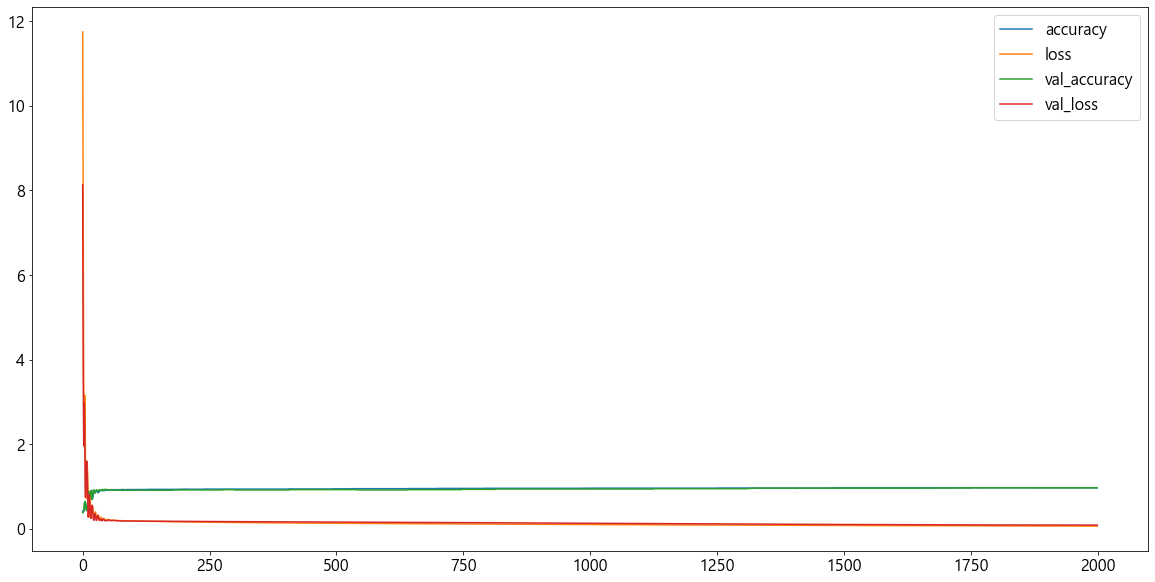

In [18]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [19]:
# 최종 모델
best_model = load_model(path2)
best_model

In [31]:
# 예측 결과를 추출한다.
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [32]:
# 진짜 결과와 비교를 한다.
r1 = accuracy_score(y_test, y_pred)
r1

0.9708029197080292

In [33]:
df2 = pd.read_csv("data/breast_cancer_new.csv")
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [34]:
# test 데이터를 예측해보자.
y_pred1 = (best_model.predict(df2) >0.5).astype("int32")
y_pred1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [36]:
target = encoder1.inverse_transform(y_pred1)
df2["target"] = target
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330,benign
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675,benign
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220,benign
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,benign
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,malignant
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,malignant
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,malignant
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,malignant
